# Data Analysis

### import all packages

In [1]:
import pandas as pd                # importing pandas as pd
import numpy as np                 # importing numpy as np    
import matplotlib.pyplot as plt    #importing matplotlib as plt
import seaborn as sns              #importing seaborn as sns
%matplotlib inline
from datetime import date
from datetime import time
import tkinter as tk
from tkinter import ttk
import pickle
import joblib
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression

### Load the dataset

In [2]:
car_data=pd.read_csv("car_price_predict_dataset.csv",encoding='ANSI')

### Remove all the insignificant columns


In [3]:
car_data.drop(['S_number','New_Price','condition','Variant','Location'],axis=1,inplace=True)
car_data.columns

Index(['Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'paint_color'],
      dtype='object')

### Remove all duplicates

In [4]:
car_data.drop_duplicates(inplace=True)

### Remove blank rows  

In [5]:
car_data.dropna(axis=0,how='all',inplace=True)

### first 10 rows of dataset

In [6]:
print(car_data.shape)
car_data.head(5)

(6018, 13)


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,paint_color
0,Maruti,Wagon R,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,blue
1,Hyundai,Creta,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,blue
2,Honda,Jazz,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50,blue
3,Maruti,Ertiga,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,orange
4,Audi,A4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74,NaN


### Change some column names using rename() function

In [7]:
car_data.rename(columns={'Year':'Year_of_Registration',  
                             'Kilometers_Driven':'Odometer_Reading',
                             'Transmission':'Transmission_Type',
                             'Mileage':'Mileage_in_kmpl',
                             'Engine':'Engine_in_cc',
                             'Power':'Power_in_bhp',
                             'Seats':'Number_of_seats',
                             'Price':'Price_in_lakh'},                         
                   inplace=True)
car_data.columns

Index(['Brand', 'Model', 'Year_of_Registration', 'Odometer_Reading',
       'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Mileage_in_kmpl',
       'Engine_in_cc', 'Power_in_bhp', 'Number_of_seats', 'Price_in_lakh',
       'paint_color'],
      dtype='object')

### read data

In [8]:
car_data_dup=car_data
car_data_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 6018 non-null   object 
 1   Model                 6018 non-null   object 
 2   Year_of_Registration  6018 non-null   int64  
 3   Odometer_Reading      6018 non-null   int64  
 4   Fuel_Type             6018 non-null   object 
 5   Transmission_Type     6018 non-null   object 
 6   Owner_Type            6018 non-null   object 
 7   Mileage_in_kmpl       6016 non-null   float64
 8   Engine_in_cc          5982 non-null   float64
 9   Power_in_bhp          5982 non-null   object 
 10  Number_of_seats       5976 non-null   float64
 11  Price_in_lakh         6018 non-null   float64
 12  paint_color           3894 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 658.2+ KB


## handling categorical values as numerical values

In [9]:
car_data_dup['Brand_id']=pd.Categorical(car_data_dup.Brand).codes
car_data_dup['Model_id']=pd.Categorical(car_data_dup.Model).codes
car_data_dup['Fuel_Type_id']=pd.Categorical(car_data_dup.Fuel_Type).codes
car_data_dup['Transmission_id']=pd.Categorical(car_data_dup.Transmission_Type).codes
car_data_dup['Owner_Type_id']=pd.Categorical(car_data_dup.Owner_Type).codes
car_data_dup['paint_id']=pd.Categorical(car_data_dup.paint_color).codes
car_data_dup.head()

,Brand,Model,Year_of_Registration,Odometer_Reading,Fuel_Type,Transmission_Type,Owner_Type,Mileage_in_kmpl,Engine_in_cc,Power_in_bhp,Number_of_seats,Price_in_lakh,paint_color,Brand_id,Model_id,Fuel_Type_id,Transmission_id,Owner_Type_id,paint_id
0,Maruti,Wagon R,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,blue,18,189,0,1,0,1
1,Hyundai,Creta,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,blue,10,53,1,1,0,1
2,Honda,Jazz,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50,blue,9,99,4,1,0,1
3,Maruti,Ertiga,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,orange,18,69,1,1,0,6
4,Audi,A4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74,NaN,1,10,1,0,2,-1


### data info

In [10]:
car_data_dup.columns

Index(['Brand', 'Model', 'Year_of_Registration', 'Odometer_Reading',
       'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Mileage_in_kmpl',
       'Engine_in_cc', 'Power_in_bhp', 'Number_of_seats', 'Price_in_lakh',
       'paint_color', 'Brand_id', 'Model_id', 'Fuel_Type_id',
       'Transmission_id', 'Owner_Type_id', 'paint_id'],
      dtype='object')

In [11]:
car_data_dup.dropna(inplace=True)
cleaned_data=car_data_dup.copy()
cleaned_data.columns

Index(['Brand', 'Model', 'Year_of_Registration', 'Odometer_Reading',
       'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Mileage_in_kmpl',
       'Engine_in_cc', 'Power_in_bhp', 'Number_of_seats', 'Price_in_lakh',
       'paint_color', 'Brand_id', 'Model_id', 'Fuel_Type_id',
       'Transmission_id', 'Owner_Type_id', 'paint_id'],
      dtype='object')

In [12]:
car_data_dup.drop(['Brand','Model','Fuel_Type','Transmission_Type','Owner_Type','Power_in_bhp','paint_color'],axis=1,inplace=True)
car_data_dup.columns

Index(['Year_of_Registration', 'Odometer_Reading', 'Mileage_in_kmpl',
       'Engine_in_cc', 'Number_of_seats', 'Price_in_lakh', 'Brand_id',
       'Model_id', 'Fuel_Type_id', 'Transmission_id', 'Owner_Type_id',
       'paint_id'],
      dtype='object')

In [13]:
cleaned_data.columns

Index(['Brand', 'Model', 'Year_of_Registration', 'Odometer_Reading',
       'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Mileage_in_kmpl',
       'Engine_in_cc', 'Power_in_bhp', 'Number_of_seats', 'Price_in_lakh',
       'paint_color', 'Brand_id', 'Model_id', 'Fuel_Type_id',
       'Transmission_id', 'Owner_Type_id', 'paint_id'],
      dtype='object')

# Remove outliners

In [14]:
car_data_dup['Odometer_Reading'] = np.where(car_data_dup['Odometer_Reading'] > 200000, 100000, car_data_dup['Odometer_Reading'])
#car_data_dup['Mileage_in_kmpl'] = np.where(car_data_dup['Mileage_in_kmpl'] > 25 , 15, car_data_dup['Mileage_in_kmpl'])

In [15]:
car_data_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3865 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_of_Registration  3865 non-null   int64  
 1   Odometer_Reading      3865 non-null   int64  
 2   Mileage_in_kmpl       3865 non-null   float64
 3   Engine_in_cc          3865 non-null   float64
 4   Number_of_seats       3865 non-null   float64
 5   Price_in_lakh         3865 non-null   float64
 6   Brand_id              3865 non-null   int8   
 7   Model_id              3865 non-null   int16  
 8   Fuel_Type_id          3865 non-null   int8   
 9   Transmission_id       3865 non-null   int8   
 10  Owner_Type_id         3865 non-null   int8   
 11  paint_id              3865 non-null   int8   
dtypes: float64(4), int16(1), int64(2), int8(5)
memory usage: 237.8 KB


In [16]:
car_data_dup['Mileage_in_kmpl']=car_data_dup['Mileage_in_kmpl'].astype('int64')
car_data_dup['Engine_in_cc']=car_data_dup['Engine_in_cc'].astype('int64')
car_data_dup['Number_of_seats']=car_data_dup['Number_of_seats'].astype('int64')
car_data_dup['Price_in_lakh']=car_data_dup['Price_in_lakh']*100000


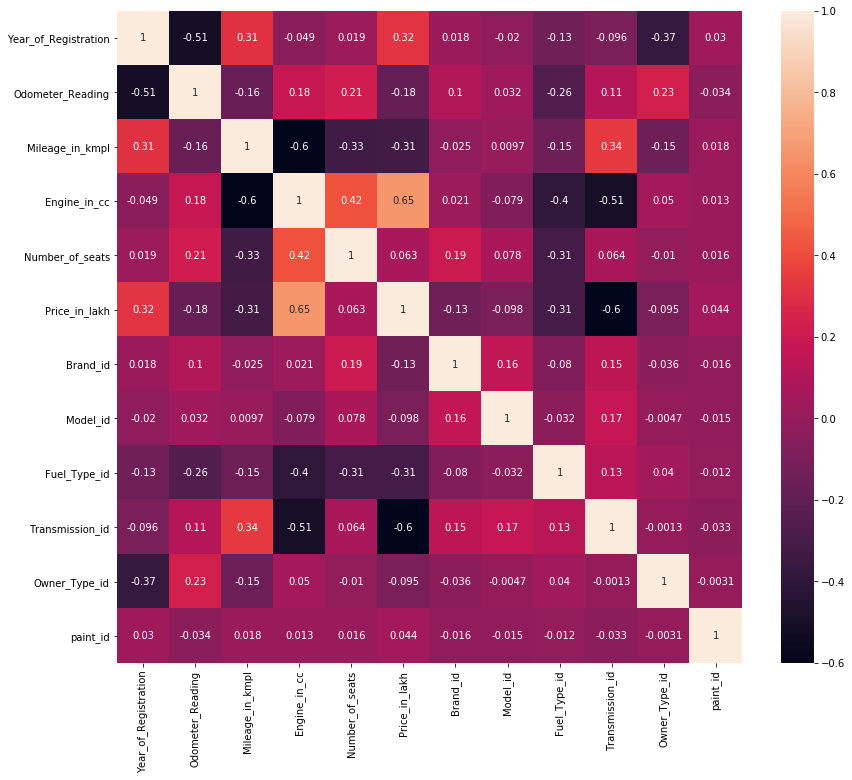

In [17]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(car_data_dup.corr(), annot=True)

In [18]:
car_data_dup.nunique()

Year_of_Registration      22
Odometer_Reading        2051
Mileage_in_kmpl           26
Engine_in_cc             133
Number_of_seats            8
Price_in_lakh           1084
Brand_id                  30
Model_id                 199
Fuel_Type_id               4
Transmission_id            2
Owner_Type_id              4
paint_id                  12
dtype: int64

# modal training

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn import metrics

### Separate the dataset into Inputs and Target (Response Variable)

In [21]:
X = car_data_dup.drop('Price_in_lakh', axis = 1 )
Y = car_data_dup['Price_in_lakh']

### Split the data into training and test data sets using test size of 0.3 and random states of 42 (default value).

In [22]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Model training-1 linear regression 

#### Import skearn Linear Regression and make an instance

In [23]:
from sklearn import linear_model
LR = linear_model.LinearRegression()

### Fit (that is Train) the training data to Linear Regression

In [24]:
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Linear Regression Score value

In [25]:
LR.score(X_train,Y_train)

0.6644937200648735

### predict the values to the Linear Regression model

In [26]:
Y_pred_LR = LR.predict(X_test)
Y_pred_LR

array([-586864.16449192, 2060006.86772525,  160121.72676009, ...,
       1205875.88383827,  778618.16692421, 2156147.88809943])

### R Squared Metric value for Multiple Linear Regression Model

In [27]:

from sklearn.metrics import r2_score
print("R_Squared of MLR Model is: %0.2f" % (r2_score(Y_test, Y_pred_LR)))

R_Squared of MLR Model is: 0.67


### MAE, MSE and RMSE for Linear Regression

In [28]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_LR))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_LR)))

MAE: 395598.55675707123
MSE: 378229440723.8957
RMSE: 615003.6103340335


In [29]:
#coefficients and intercept
print("Coefficients ",LR.coef_)
print("Intercepts ",LR.intercept_)

Coefficients  [ 9.45542244e+04 -3.72631146e+00 -2.69825219e+04  9.72693535e+02
 -2.47101923e+05 -1.27313994e+04  2.01377561e+02 -9.77438790e+04
 -4.88803839e+05 -1.35505927e+03  7.79827755e+03]
Intercepts  -188309688.74263814


### Coefficient with respect to every column

In [30]:
coeff = pd.DataFrame(data = LR.coef_, index = X.columns, columns = ['Coefficient'])
print(coeff)

                        Coefficient
Year_of_Registration   94554.224382
Odometer_Reading          -3.726311
Mileage_in_kmpl       -26982.521887
Engine_in_cc             972.693535
Number_of_seats      -247101.923173
Brand_id              -12731.399428
Model_id                 201.377561
Fuel_Type_id          -97743.878984
Transmission_id      -488803.838677
Owner_Type_id          -1355.059271
paint_id                7798.277547


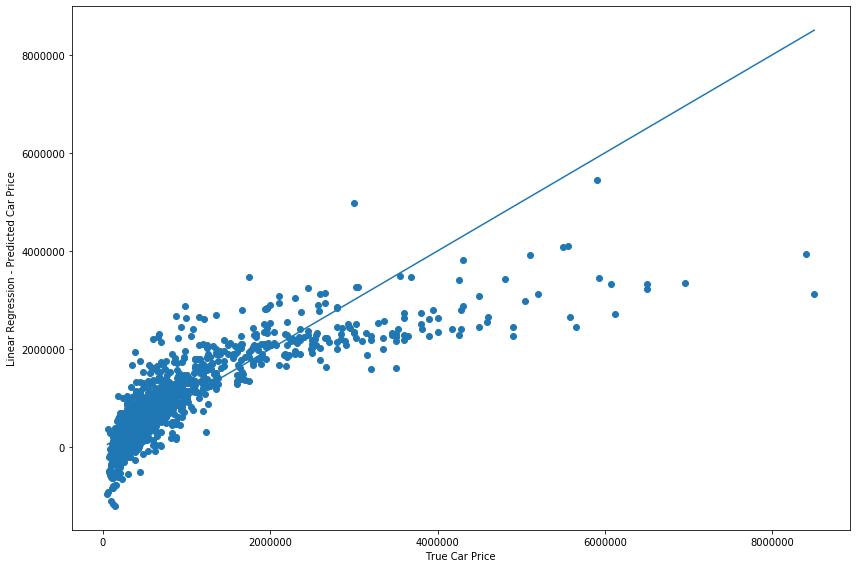

In [31]:
# create the Scatter plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(Y_test, Y_pred_LR)
plt.xlabel('True Car Price')
plt.ylabel('Linear Regression - Predicted Car Price')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)])
plt.tight_layout()

# cross validation of linear regression

In [32]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [33]:
# Compute Prediction score of Multiple Linear Regression model on the dataset by splitting the data and 
# calculating the score 10 consecutive times with different splits each time
Scores_LR = cross_val_score(LR, X, Y,cv=10)

In [34]:
Scores_LR

array([0.65196801, 0.66785667, 0.68016336, 0.57860005, 0.66937218,
       0.65810339, 0.5775547 , 0.68479621, 0.73225164, 0.63735223])

In [35]:
# Calculate the mean or average score of the 10 different models
Score_LR = cross_val_score(LR, X, Y,cv=10).mean() * 100
print("Average Score of Multiple Linear Regression Model is: " , Score_LR)

Average Score of Multiple Linear Regression Model is:  65.3801845115716


In [36]:
## Calculate the mean or average prediction score and standard deviation
print(" %0.2f (+/- %0.2f)" % (Scores_LR.mean(), Scores_LR.std() * 2))

 0.65 (+/- 0.09)


In [37]:
# Obtaining predictions by cross-validation cross_val_predict function
# cross_val_predict returns for each element in the input or features data the prediction that was 
# produced for that element when it was in the test set import cross_val_predict
from sklearn.model_selection import cross_val_predict
cross_val_Y_pred_LR = cross_val_predict(LR, X, Y, cv=10)

In [38]:
# Display the first 10 of Numpy array
cross_val_Y_pred_LR[:10]

array([-126925.48630068, 1171526.32837605,  160012.8963263 ,
       -233836.26596913,  469122.62709641, 2165870.66594094,
        699385.89692464,  176130.98482582,  996869.63146427,
        983700.05358306])

In [39]:
# Multiple Linear Regression with Cross Validation R Squared Metric.
# R Squared has a value between 0 and 1
# Determine the goodness of fit of predicted used car prices to the true values.
R_Squared_result_LR = cross_val_score(LR, X, Y, cv=10, scoring='r2')
print( (R_Squared_result_LR.mean(), R_Squared_result_LR.std() * 2))

(0.6538018451157159, 0.08946802034279852)


In [40]:
# Cross Validation Linear Regression MAE
MAE_result_LR = cross_val_score(LR, X, Y, cv=10, scoring='neg_mean_absolute_error')
# Cross Validation Linear Regression MSE and RMSE
MSE_result_LR = cross_val_score(LR, X, Y, cv=10, scoring='neg_mean_squared_error')

print("MAE of Multiple Linear Regression is: %0.2f (+/- %0.2f)" % (MAE_result_LR.mean(),MAE_result_LR.std() * 2))
print("MSE of Multiple Linear Regression is: %0.2f (+/- %0.2f)" % (MSE_result_LR.mean(),MSE_result_LR.std() * 2))
print("RMSE of MLR is: %0.2f (+/-)" % (np.sqrt(-(MSE_result_LR.mean()))), np.sqrt(MSE_result_LR.std() * 2))


MAE of Multiple Linear Regression is: -389830.37 (+/- 43047.25)
MSE of Multiple Linear Regression is: -387327466458.00 (+/- 144824818921.11)
RMSE of MLR is: 622356.38 (+/-) 380558.5617498392


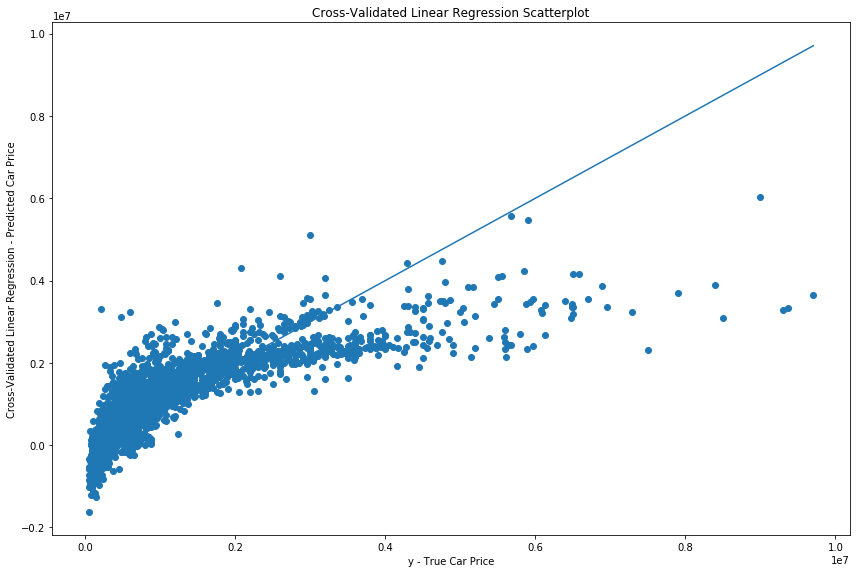

In [41]:
# Create Cross-Validation Scatter Plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(Y,cross_val_Y_pred_LR)
plt.xlabel('y - True Car Price')
plt.ylabel('Cross-Validated Linear Regression - Predicted Car Price')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)])
plt.tight_layout()
plt.title('Cross-Validated Linear Regression Scatterplot')
plt.savefig('Cross-Validated Linear Regression Scatterplot.pdf')

# Model Training -2 Decision Tree

In [42]:
# Import SK Learn Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
# Create Decision Tree Regressor
DTR = DecisionTreeRegressor(random_state=42)

In [44]:
# Fit (that is Train) the training data to Decision Tree Regressor
DTR.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [45]:
# Produce Decision Tree Regressor Score value
DTR.score(X_test,Y_test)

0.7563891172378937

In [46]:
# predict the values by providing the test data to the Decision Tree Regression model
Y_pred_DTR = DTR.predict(X_test)
# Display the first 10 of Numpy array
Y_pred_DTR

array([ 170000., 1900000.,  750000., ...,  875000.,  799000., 3567000.])

In [47]:
# Compute and Display R Squared Metric value 
# for Decision Tree Regression Model
from sklearn.metrics import r2_score
print("R_Squared of Decision Tree Regression Model is: %0.2f" % (r2_score(Y_test, Y_pred_DTR)))

R_Squared of Decision Tree Regression Model is: 0.76


In [48]:
# Dislay MAE, MSE and RMSE for Decision Tree Regression model
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_DTR))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_DTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_DTR)))

MAE: 243710.3448275862
MSE: 277217320689.65515
RMSE: 526514.3119513991


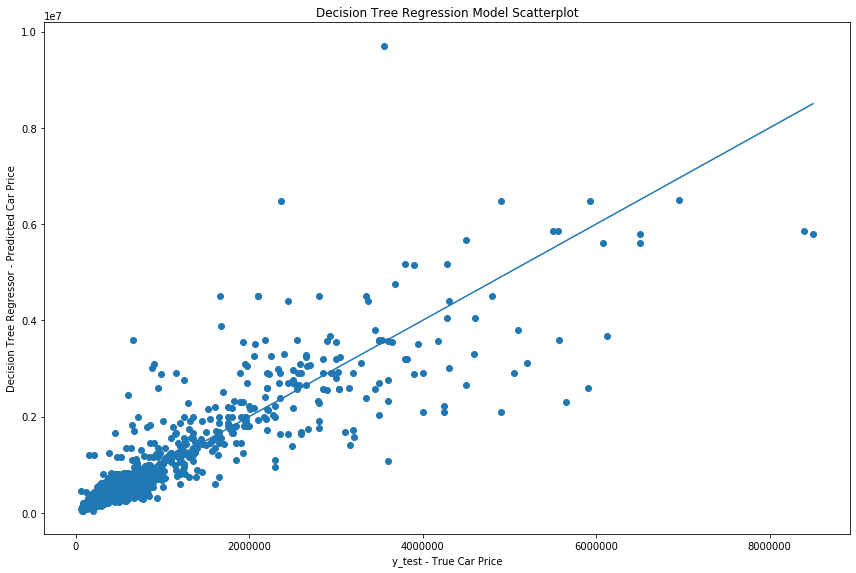

In [49]:
# create the Scatter plot of Decision Tree Regression model
plt.figure(figsize=(12,8))
plt.scatter(Y_test, Y_pred_DTR)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Decision Tree Regressor - Predicted Car Price')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)])
plt.tight_layout()
plt.title('Decision Tree Regression Model Scatterplot')
plt.savefig('Decision Tree Regression Model Scatterplot.pdf')

# Cross Validation of Decision Tree

In [50]:
# Compute Prediction score of Decision Tree Regression on the dataset by splitting the data and 
# calculating the score 10 consecutive times with different splits each time
Scores_DTR = cross_val_score(DTR, X, Y, cv=10)
# Display the Decision Tree Scores - R Squared displayed 10 Times
Scores_DTR

array([0.76867993, 0.79451377, 0.68128753, 0.80170085, 0.77128884,
       0.68606997, 0.72003728, 0.78174506, 0.77078309, 0.68565501])

In [51]:
# Calculate the mean or average score of the 10 different models
Score_DTR = cross_val_score(DTR, X, Y, cv=10).mean() * 100
print("Average Score of Decision Tree Regression Model is: " , Score_DTR)

Average Score of Decision Tree Regression Model is:  74.61761335143989


In [52]:
## Calculate the mean or average decision tree score and standard deviation
print("Average Score of Decision Tree Regression Model is: %0.2f (+/- %0.2f)" % (Scores_DTR.mean(), Scores_DTR.std() * 2))

Average Score of Decision Tree Regression Model is: 0.75 (+/- 0.09)


In [53]:
# Obtaining predictions by cross-validation cross_val_function
# cross_val_function returns for each element in the input or features data the prediction that was produced for that element when it was in the test set.
# import cross_val_predict
from sklearn.model_selection import cross_val_predict
cross_val_Y_pred_DTR = cross_val_predict(DTR, X, Y, cv=10)
# Display the first 10 of Numpy array
cross_val_Y_pred_DTR[:10]

array([ 275000., 1190000.,  265000.,  585000.,  259000., 1350000.,
        489000.,  120000.,  790000.,  445000.])

In [54]:
# Decision Tree Regression with Cross Validation R Squared Metric.
# R Squared has a value between 0 and 1
# Determine the goodness of fit of predicted used car prices to the true values.
R_Squared_result_DTR = cross_val_score(DTR, X, Y, cv=10, scoring='r2')
print("R Squared of DTR with Cross Validation Model is: %0.2f (+/- %0.2f)" % (R_Squared_result_DTR.mean(), R_Squared_result_DTR.std() * 2))

R Squared of DTR with Cross Validation Model is: 0.75 (+/- 0.09)


In [55]:
# Cross Validation Decision Tree Regression MAE
MAE_result_DTR = cross_val_score(DTR, X, Y, cv=10, scoring='neg_mean_absolute_error')

# Cross Validation Decision Tree MSE and RMSE
MAE_result_DTR = cross_val_score(DTR, X, Y, cv=10, scoring='neg_mean_squared_error')

print("MAE of Decision Tree Regression is: %0.2f (+/- %0.2f)" % (MAE_result_DTR.mean(), MAE_result_DTR.std() * 2))
print("MSE of Decision Tree Regression is: %0.2f (+/- %0.2f)" % (MAE_result_DTR.mean(), MAE_result_DTR.std() * 2))
print("RMSE of DTR is: %0.2f (+/-)" % (np.sqrt(-(MAE_result_DTR.mean()))), np.sqrt(MAE_result_DTR.std() * 2))

MAE of Decision Tree Regression is: -284027236475.28 (+/- 121503581475.97)
MSE of Decision Tree Regression is: -284027236475.28 (+/- 121503581475.97)
RMSE of DTR is: 532942.06 (+/-) 348573.63852703007


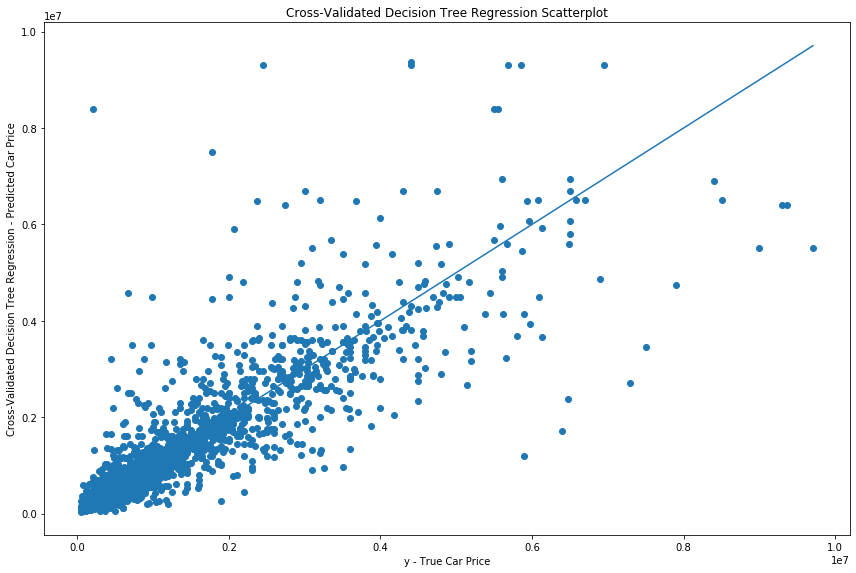

In [56]:
# Create Scatter Plot of Decision Tree Regression model with Cross-Validation
plt.figure(figsize=(12,8))
plt.scatter(Y, cross_val_Y_pred_DTR)
plt.xlabel('y - True Car Price')
plt.ylabel('Cross-Validated Decision Tree Regression - Predicted Car Price')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)])
plt.tight_layout()
plt.title('Cross-Validated Decision Tree Regression Scatterplot')
plt.savefig('Cross-Validated Decision Tree Regression Scatterplot.pdf')

# Model Training 3 - Random Forest Algorithm

In [57]:
# Import SK Learn Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Create Random Forest Regressor instance
RFR = RandomForestRegressor(random_state=42)

In [58]:
# Fit the training data to Random Forest Regressor
RFR.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [59]:
# Produce Random Forest Regressor Score value
RFR.score(X_test, Y_test)

0.8638464716590837

In [60]:
# predict the values by providing the test data to the Random Forest Regression model
Y_pred_RFR = RFR.predict(X_test)
Y_pred_RFR

array([ 186620., 1795830.,  737860., ...,  816480.,  620240., 3211220.])

In [61]:
# Dislay MAE, MSE and RMSE for Decision Tree Regression model
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred_RFR))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred_RFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_RFR)))

MAE: 191136.24137931035
MSE: 154936084550.74713
RMSE: 393619.21262909303


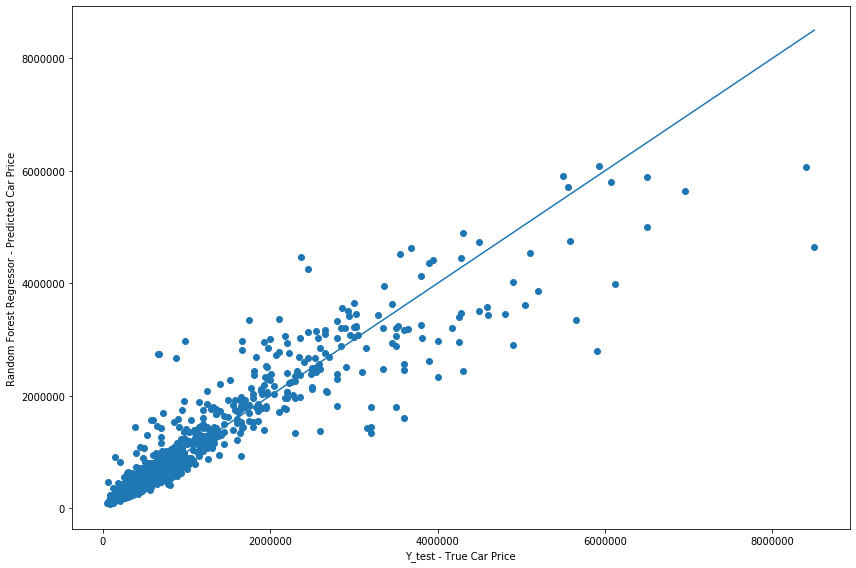

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(Y_test, Y_pred_RFR)
plt.xlabel('Y_test - True Car Price')
plt.ylabel('Random Forest Regressor - Predicted Car Price')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)])
plt.tight_layout()

In [63]:
cleaned_data.columns

Index(['Brand', 'Model', 'Year_of_Registration', 'Odometer_Reading',
       'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Mileage_in_kmpl',
       'Engine_in_cc', 'Power_in_bhp', 'Number_of_seats', 'Price_in_lakh',
       'paint_color', 'Brand_id', 'Model_id', 'Fuel_Type_id',
       'Transmission_id', 'Owner_Type_id', 'paint_id'],
      dtype='object')

In [64]:

# Tkinter GUI

from tkinter import *
import tkinter as tk
from PIL import Image, ImageTk
import PIL.Image
import PIL.ImageTk

root= Tk()

    
class Placeholder_State(object):
     __slots__ = 'normal_color', 'normal_font', 'placeholder_text', 'placeholder_color', 'placeholder_font', 'with_placeholder'

def add_placeholder_to(entry, placeholder, color="gray26", font=None):
    normal_color = entry.cget("fg")
    normal_font = entry.cget("font")
    
    if font is None:
        font = normal_font

    state = Placeholder_State()
    state.normal_color=normal_color
    state.normal_font=normal_font
    state.placeholder_color=color
    state.placeholder_font=font
    state.placeholder_text = placeholder
    state.with_placeholder=True

    def on_focusin(event, entry=entry, state=state):
        if state.with_placeholder:
            entry.delete(0, "end")
            entry.config(fg = state.normal_color, font=state.normal_font)
        
            state.with_placeholder = False

    def on_focusout(event, entry=entry, state=state):
        if entry.get() == '':
            entry.insert(0, state.placeholder_text)
            entry.config(fg = state.placeholder_color, font=state.placeholder_font)
            
            state.with_placeholder = True

    entry.insert(0, placeholder)
    entry.config(fg = color, font=font)

    entry.bind('<FocusIn>', on_focusin, add="+")
    entry.bind('<FocusOut>', on_focusout, add="+")
    
    entry.placeholder_state = state

    return state


FINAL1=StringVar(root)
FINAL2=StringVar(root)
FINAL1.set("Here is your car value!!!\n Rs. ")
FINAL2.set("0")

def click():
    year_ip=y.get()
    km_ip=d.get()
    mileage_ip=milg.get()
    engine_ip=egn.get()
    seats_ip=seat.get()
    brand_ip=br.get()
    model_ip=m.get()
    fuel_ip=f.get()
    trans_ip=t.get()
    owner_ip=ow.get()
    paint_ip=p.get()
    
    a=np.array(cleaned_data[cleaned_data['Transmission_Type']==trans_ip].Transmission_id)
    trans_ip=a[0]
    a=np.array(cleaned_data[cleaned_data['Brand']==brand_ip].Brand_id)
    brand_ip=a[0]
    a=np.array(cleaned_data[cleaned_data['Model']==model_ip].Model_id)
    model_ip=a[0]
    a=np.array(cleaned_data[cleaned_data['Fuel_Type']==fuel_ip].Fuel_Type_id)
    fuel_ip=a[0]
    a=np.array(cleaned_data[cleaned_data['Owner_Type']==owner_ip].Owner_Type_id)
    owner_ip=a[0]
    a=np.array(cleaned_data[cleaned_data['paint_color']==paint_ip].paint_id)
    paint_ip=a[0]


    TEST=np.array([int(year_ip),int(km_ip),int(mileage_ip),int(engine_ip),int(seats_ip),int(brand_ip),int(model_ip),int(fuel_ip),int(trans_ip),int(owner_ip),int(paint_ip)])
    TEST=pd.DataFrame([TEST])

    FINAL1.set("Predicted price in Rupees")
    Label(root,textvariable=FINAL1, height=1,width=20, font='comicsansms 19 bold', bg="yellow").place(x=500,y=350)
    
    FINAL2.set(*RFR.predict(TEST))
    Label(root,textvariable=FINAL2, height=1,width=20, font=('verdana', 16, 'bold'), bg="yellow").place(x=500,y=380)
    
#root.iconbitmap('python_logo.ico')
root.title("CAR PRICE PREDICTOR")
root.geometry("800x700")
root.config(bg="Grey")
col="yellow"
fontt=('cominsansms 11 bold')
space=50
wid=36
Ewidth=41
labelfont = ('Comic Sans MS', 30, 'bold','italic')


image = Image.open("f.png")
photo = ImageTk.PhotoImage(image)
Label(image=photo).grid(row=0,column=0)

# year of registration
year = ["2020","2019","2018","2017","2016","2015","2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001","2000","1999","1998","1997","1996","1995"]
year.sort()
y = StringVar(root)
y.set("Year_of_Registration")
drop3 = OptionMenu(root, y, *year)
drop3.config(font=fontt,bg=col ,width=wid)
drop3.place(x=space,y=space+50)
drop3['menu'].config(font=('verdana',(15)),bg=col)



# model type
model = ['Wagon R', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra',
       'Innova', 'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover',
       'Pajero', 'Amaze', 'Duster', 'New', 'i20', 'Alto', 'Vitara', 'KUV', 'Polo',
       'Nano', 'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10',
       'X-Trail', 'Zen', 'Figo', 'XUV500', 'Brio', 'Fiesta', 'Santro', 'Zest', 'Ritz',
       'Fortuner', 'Ecosport', 'Verna', 'GO', 'Omni', 'Etios',
       'Eeco', 'Scorpio', 'Beat',]
model.sort()
m = StringVar(root)
m.set("Model")
drop3 = OptionMenu(root, m, *model)
drop3.config(font=fontt,bg=col ,width=wid)
drop3.place(x=space,y=space+100)
drop3['menu'].config(font=('verdana',(15)),bg=col)



# fuel type
Fuel = ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']
Fuel.sort()
f = StringVar(root)
f.set("Fuel_Type")
drop5 = OptionMenu(root, f, *Fuel)
drop5.config(font=fontt,bg=col ,width=wid)
drop5.place(x=space,y=space+150)
drop5['menu'].config(font=('Courier',(15)),bg=col)



#paint_color
paint = ['blue', 'orange', 'white', 'black', 'silver', 'red', 'grey',
       'purple', 'custom', 'green', 'brown', 'yellow']
paint.sort()
p = StringVar(root)
p.set("paint_color")
drop8 = OptionMenu(root, p, *paint)
drop8.config(font=fontt,bg=col ,width=wid)
drop8.place(x=space,y=space+200)
drop8['menu'].config(font=('verdana',(15)),bg=col)




# brand value
brand = ['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini']
brand.sort()
br = StringVar(root)
br.set("Brand")
drop2 = OptionMenu(root, br, *brand)
drop2.config(font=fontt,bg=col ,width=wid)
drop2.place(x=space+400,y=space+50)
drop2['menu'].config(font=('verdana',(15)),bg=col)





# Transmission_Type
Transmission = ['Automatic','Manual']
t = StringVar(root)
t.set("Transmission_Type")
drop6 = OptionMenu(root, t, *Transmission)
drop6.config(font=fontt,bg=col ,width=wid)
drop6.place(x=space+400,y=space+100)
drop6['menu'].config(font=('verdana',(15)),bg=col)




#Owner_Type
owner = ['First', 'Second', 'Third', 'Fourth & Above',]
ow = StringVar(root)
ow.set("Owner_Type")
drop7 = OptionMenu(root, ow, *owner)
drop7.config(font=fontt,bg=col ,width=wid)
drop7.place(x=space+400,y=space+150)
drop7['menu'].config(font=('verdana',(15)),bg=col)





# Odometer_Reading
d = IntVar(root)
e1 = tk.Entry(root,textvariable=d)
e1.config(font=fontt,bg=col ,width=Ewidth)
e1.place(x=space+800,y=space+50)
add_placeholder_to(e1,'\tOdometer_Reading - ')


#mileage_in_kmpl
milg = IntVar(root)
e2 = tk.Entry(root,textvariable=milg)
e2.config(font=fontt,bg=col ,width=Ewidth)
e2.place(x=space+800,y=space+100)
add_placeholder_to(e2, '\tMileage_in_kmpl -  ')



#Engine_in_cc
egn = IntVar(root)
e3 = tk.Entry(root,textvariable=egn)
e3.config(font=fontt,bg=col ,width=Ewidth)
e3.place(x=space+800,y=space+160)
add_placeholder_to(e3, '\tEngine_in_cc -  ')


#Number_of_seats
seat = IntVar(root)
e4 = tk.Entry(root,textvariable=seat)
e4.config(font=fontt,bg=col ,width=Ewidth)
e4.place(x=space+800,y=space+200)
add_placeholder_to(e4, '\tNumber_of_Seats - ')


button = tk.Button(root, text='PREDICT', width=25, command=lambda:click())
button.config(font=fontt,bg="green",width=15,fg="white")
button.place(x=40,y=space+570)

button = tk.Button(root, text='EXIT', width=25, command=root.destroy )
button.config(font=fontt,bg="red",width=15,fg="white")
button.place(x=200,y=space+570)

root.mainloop()